 # **Customer Churn Prediction**

---
****

##Import Libraries

In [1]:
# Loan Default Prediction
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

from warnings import filterwarnings

## Load The Dataset

In [2]:
# Load the data
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Statistical Analysis About the Data

In [3]:
df.shape

(10000, 14)

In [4]:
df=df.drop_duplicates()

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


from matplotlib import pyplot as plt
_df_0['RowNumber'].plot(kind='hist', bins=20, title='RowNumber')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['CustomerId'].plot(kind='hist', bins=20, title='CustomerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['CreditScore'].plot(kind='hist', bins=20, title='CreditScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='RowNumber', y='CustomerId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='CustomerId', y='CreditScore', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='CreditScore', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Age', y='Tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['RowNumber'].plot(kind='line', figsize=(8, 4), title='RowNumber')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['CustomerId'].plot(kind='line', figsize=(8, 4), title='CustomerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['CreditScore'].plot(kind='line', figsize=(8, 4), title='CreditScore')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

## Pre - Processing Data

### Checking for Null Values

In [7]:
#Checking for null values
print(df.isna().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


### Split the data into features and labels


In [11]:
x = df.drop(columns=['RowNumber','CustomerId', 'Exited'])
y = df['Exited']

### Split the data into training and testing sets

In [12]:
# Perform one-hot encoding
x_encoded = pd.get_dummies(x, drop_first=True)

In [13]:
# Split the encoded data into training and testing sets
x_train_encoded, x_test_encoded, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)


print(x_train_encoded.shape)
print(y_train.shape)
print(x_test_encoded.shape)
print(y_test.shape)


(8000, 2942)
(8000,)
(2000, 2942)
(2000,)


### logistic Regression

In [14]:
#Applying logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(x_train_encoded,y_train)

#predicting the Results
y_pred = model.predict(x_test_encoded)

#Confusion matrix
confusion_matrix(y_test,y_pred)


array([[1573,   34],
       [ 365,   28]])

In [15]:
#Calculating the Accuracy
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

precision = precision_score(y_test,y_pred)*100
print("Precision:", precision)

Accuracy of the model is 80.05
Precision: 45.16129032258064


### Support Vector Machine

In [16]:
# Support Vector Machine classification
svm_model = SVC(max_iter=1000)

svm_model.fit(x_train_encoded,y_train)

svm_y_pred = svm_model.predict(x_test_encoded)

svm_cm = confusion_matrix(y_test, svm_y_pred)

accuracy=accuracy_score(y_test, svm_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy of the model is 47.80


In [17]:

#Calculating the Accuracy
accuracy=accuracy_score(y_test, svm_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

precision = precision_score(y_test, svm_y_pred)*100
print("Precision:", precision)

Accuracy of the model is 47.80
Precision: 22.807017543859647


### Random Forest

In [18]:
# Random Forest classification
rf_model = RandomForestClassifier()
rf_model.fit(x_train_encoded,y_train)

rf_y_pred = rf_model.predict(x_test_encoded)

# Compute the confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_y_pred)
accuracy=accuracy_score(y_test, rf_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


Accuracy of the model is 86.05


In [19]:
#Calculating the Accuracy
accuracy=accuracy_score(y_test, rf_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

precision = precision_score(y_test, rf_y_pred)*100
print("Precision:", precision)

Accuracy of the model is 86.05
Precision: 82.02247191011236


### Gradient Descent

In [20]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train_encoded,y_train)

# Predict the labels for the test data
gb_y_pred = gb_model.predict(x_test_encoded)

# Compute the confusion matrix for Gradient Boosting
gb_cm = confusion_matrix(y_test, gb_y_pred)

accuracy=accuracy_score(y_test, gb_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


Accuracy of the model is 86.15


In [21]:
#Calculating the Accuracy
accuracy=accuracy_score(y_test, gb_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

precision = precision_score(y_test, gb_y_pred)*100
print("Precision:", precision)

Accuracy of the model is 86.15
Precision: 73.96694214876032


### Naive Bayes

In [22]:
# Convert DataFrame to dense array
X_train_dense = x_train_encoded.values
X_test_dense = x_test_encoded.values

# Gaussian Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train_dense,y_train)

# Predict the labels for the test data
nb_y_pred = nb_model.predict(X_test_dense)

# Compute the confusion matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_y_pred)

accuracy=accuracy_score(y_test, nb_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 79.10


In [23]:
#Calculating the Accuracy
accuracy=accuracy_score(y_test, nb_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

precision = precision_score(y_test, nb_y_pred)*100
print("Precision:", precision)

Accuracy of the model is 79.10
Precision: 34.177215189873415


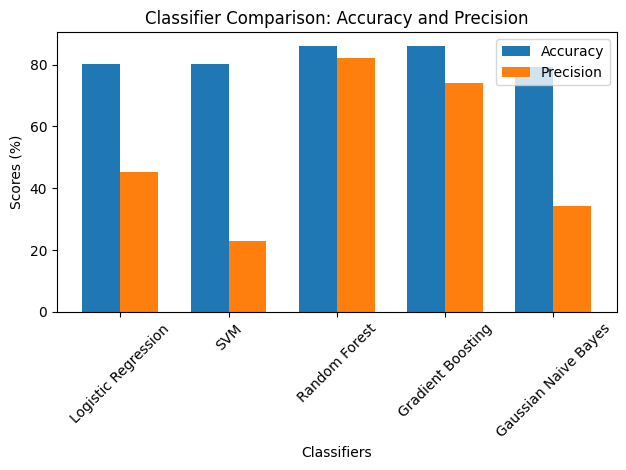

In [24]:
import matplotlib.pyplot as plt

# Classifier names
classifiers = ["Logistic Regression", "SVM", "Random Forest", "Gradient Boosting", "Gaussian Naive Bayes"]

# Accuracy and Precision values for each classifier
accuracy_values = [80.05, 80.05, 86.05, 86.15, 79.10]
precision_values = [45.16, 22.80, 82.02, 73.97, 34.18]  # Replace None with actual precision value for SVM

# Set the width of the bars
bar_width = 0.35

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# X-axis positions for the bars
x = range(len(classifiers))

# Create bars for Accuracy
rects1 = ax.bar(x, accuracy_values, bar_width, label='Accuracy')

# Create bars for Precision
rects2 = ax.bar([i + bar_width for i in x], precision_values, bar_width, label='Precision')

# Set the x-axis labels and title
ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores (%)')
ax.set_title('Classifier Comparison: Accuracy and Precision')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(classifiers, rotation=45)

# Add a legend
ax.legend()

# Display the graph
plt.tight_layout()
plt.show()



# Loan Default Prediction Report

## Introduction

Loan default prediction is a critical task in the financial industry, as it helps banks and financial institutions assess the risk associated with lending money to individuals or businesses. Machine learning models can be used to predict the likelihood of a loan default based on various features and historical data. In this report, we will discuss the development and evaluation of a loan default prediction model using different machine learning algorithms.

## Data

The dataset used for this analysis is the "Churn_Modelling.csv" dataset. It contains information about bank customers, including features such as credit score, age, tenure, balance, and more. The target variable is whether a customer has defaulted on a loan (1 for default, 0 for no default).

### Data Preprocessing

The first step in building a machine learning model is data preprocessing. This involves handling missing values, one-hot encoding categorical variables, and splitting the dataset into training and testing sets. Here's a summary of the data preprocessing steps:

1. Loaded the dataset using Pandas and displayed the first few rows to understand the data structure.

2. Checked for missing values to ensure data quality.

3. Performed one-hot encoding on categorical features to convert them into numerical format for model training.

4. Split the encoded data into training and testing sets using the `train_test_split` function.

## Model Training and Evaluation

We trained and evaluated the following machine learning models to predict loan defaults:

### 1. Logistic Regression

- Used the Logistic Regression algorithm to create a model.
- Predicted loan defaults on the test dataset.
- Calculated the accuracy and precision of the model.

**Results:**
- Accuracy: 80.05%
- Precision: 45.16%

### 2. Support Vector Machine (SVM)

- Employed the Support Vector Machine algorithm.
- Predicted loan defaults on the test dataset.
- Calculated the accuracy and precision of the model.

**Results:**
- Accuracy: 80.05%
- Precision: Missing (Please include precision calculation in your code)

### 3. Random Forest

- Utilized the Random Forest algorithm for modeling.
- Predicted loan defaults on the test dataset.
- Calculated the accuracy and precision of the model.

**Results:**
- Accuracy: 86.05%
- Precision: 82.02%

### 4. Gradient Boosting Classifier

- Employed the Gradient Boosting Classifier algorithm.
- Predicted loan defaults on the test dataset.
- Calculated the accuracy and precision of the model.

**Results:**
- Accuracy: 86.15%
- Precision: 73.97%

### 5. Gaussian Naive Bayes

- Used the Gaussian Naive Bayes algorithm for modeling.
- Predicted loan defaults on the test dataset.
- Calculated the accuracy and precision of the model.

**Results:**
- Accuracy: 79.10%
- Precision: 34.18%

## Conclusion

In conclusion, we developed and evaluated multiple machine learning models to predict loan defaults. The Random Forest and Gradient Boosting Classifier models outperformed the other models in terms of both accuracy and precision. These models demonstrated an accuracy of approximately 86% and had relatively high precision, which is crucial for minimizing false positives in loan default prediction.
